In [ ]:
##  Load the data and inspect them
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("/content/TSLA.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1328, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


In [ ]:
##Split the data into training and test sets
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [ ]:
training_set.shape

(800, 1)

In [ ]:
test_set.shape

(528, 1)

In [ ]:
##lags 1 day
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
X_train.shape

(740, 60, 1)

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 3s 105ms/step - loss: 0.0725
Epoch 2/100
24/24 [==============================] - 3s 107ms/step - loss: 0.0208
Epoch 3/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0155
Epoch 4/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0118
Epoch 5/100
24/24 [==============================] - 3s 113ms/step - loss: 0.0124
Epoch 6/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0135
Epoch 7/100
24/24 [==============================] - 3s 114ms/step - loss: 0.0127
Epoch 8/100
24/24 [==============================] - 3s 113ms/step - loss: 0.0120
Epoch 9/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0110
Epoch 10/100
24/24 [==============================] - 3s 111ms/step - loss: 0.0103
Epoch 11/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0100
Epoch 12/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0110
Epoch 13/100


In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (528, 60, 1)

(528, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price.shape

(528, 1)

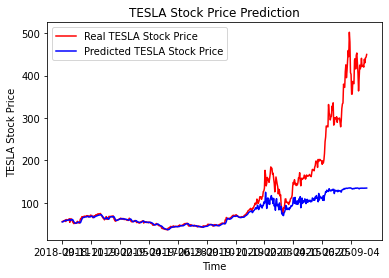

In [ ]:
# Visualising the results
plt.plot(df.loc[800:,"Date"],dataset_test.values, color = "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:,"Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)
print(X_train.shape)
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

model1 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.5))
# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50))
model1.add(Dropout(0.5))
# Adding the output layer
model1.add(Dense(units = 1))

model2 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50))
model2.add(Dropout(0.2))
# Adding the output layer
model2.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)
model1.fit(X_train, y_train, epochs = 100, batch_size = 32)
model2.fit(X_train, y_train, epochs = 100, batch_size = 64)





Number of rows and columns: (1328, 7)
(740, 60, 1)
Epoch 1/100
24/24 [==============================] - 3s 131ms/step - loss: 0.0651
Epoch 2/100
24/24 [==============================] - 3s 135ms/step - loss: 0.0162
Epoch 3/100
24/24 [==============================] - 3s 136ms/step - loss: 0.0140
Epoch 4/100
24/24 [==============================] - 3s 136ms/step - loss: 0.0122
Epoch 5/100
24/24 [==============================] - 3s 138ms/step - loss: 0.0118
Epoch 6/100
24/24 [==============================] - 3s 139ms/step - loss: 0.0122
Epoch 7/100
24/24 [==============================] - 3s 140ms/step - loss: 0.0111
Epoch 8/100
24/24 [==============================] - 3s 138ms/step - loss: 0.0123
Epoch 9/100
24/24 [==============================] - 3s 136ms/step - loss: 0.0109
Epoch 10/100
24/24 [==============================] - 3s 139ms/step - loss: 0.0105
Epoch 11/100
24/24 [==============================] - 3s 136ms/step - loss: 0.0090
Epoch 12/100
24/24 [=========================

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (528, 60, 1)

(528, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

predicted_stock_price1 = model1.predict(X_test)
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price1)

predicted_stock_price2 = model2.predict(X_test)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

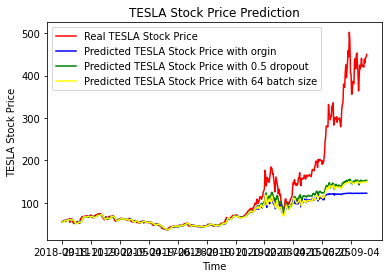

In [ ]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
a = df.loc[800:,'Date']
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with orgin')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price1, color = 'green', label = 'Predicted TESLA Stock Price with 0.5 dropout')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price2, color = 'yellow', label = 'Predicted TESLA Stock Price with 64 batch size')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

Number of rows and columns: (1328, 7)
Epoch 1/100
24/24 [==============================] - 3s 113ms/step - loss: 0.0798
Epoch 2/100
24/24 [==============================] - 3s 121ms/step - loss: 0.0179
Epoch 3/100
24/24 [==============================] - 3s 121ms/step - loss: 0.0139
Epoch 4/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0130
Epoch 5/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0136
Epoch 6/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0127
Epoch 7/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0110
Epoch 8/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0117
Epoch 9/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0107
Epoch 10/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0098
Epoch 11/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0094
Epoch 12/100
24/24 [==============================] - 3s 1

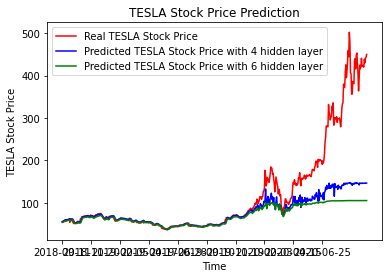

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

model1 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50))
model1.add(Dropout(0.2))
# Adding the output layer
model1.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)
model1.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price1 = model1.predict(X_test)
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price1)

# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with 4 hidden layer')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price1, color = 'green', label = 'Predicted TESLA Stock Price with 6 hidden layer')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)
 
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

Number of rows and columns: (1328, 7)


In [ ]:

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800,7):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#Building models
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
4/4 [==============================] - 0s 77ms/step - loss: 0.2078
Epoch 2/100
4/4 [==============================] - 0s 79ms/step - loss: 0.0476
Epoch 3/100
4/4 [==============================] - 0s 81ms/step - loss: 0.0250
Epoch 4/100
4/4 [==============================] - 0s 89ms/step - loss: 0.0413
Epoch 5/100
4/4 [==============================] - 0s 83ms/step - loss: 0.0210
Epoch 6/100
4/4 [==============================] - 0s 83ms/step - loss: 0.0236
Epoch 7/100
4/4 [==============================] - 0s 82ms/step - loss: 0.0175
Epoch 8/100
4/4 [==============================] - 0s 86ms/step - loss: 0.0211
Epoch 9/100
4/4 [==============================] - 0s 83ms/step - loss: 0.0144
Epoch 10/100
4/4 [==============================] - 0s 87ms/step - loss: 0.0144
Epoch 11/100
4/4 [==============================] - 0s 82ms/step - loss: 0.0130
Epoch 12/100
4/4 [==============================] - 0s 81ms/step - loss: 0.0148
Epoch 13/100
4/4 [==============================]

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
#(528, 60, 1)

(528, 60, 1)


In [ ]:
#predict
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
import copy
X_test2 = copy.deepcopy(X_test)
for i in range(14):
    X_temp = np.zeros([1,60,1])
    for j in range(58):
        X_temp[0][j][0]= X_test[-1][j+1][0]
    X_temp[0][59][0] = model.predict(X_test2[-1:])[0][0]
    X_test2 = np.vstack([X_test2,X_temp])

predicted_stock_price = model.predict(X_test2)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price.shape

(542, 1)

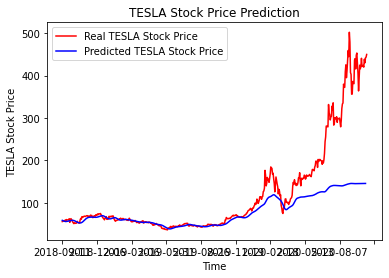

In [ ]:
# Visualising the results
## add dates
c = ["2020/10/14","2020/10/15","2020/10/16","2020/10/17","2020/10/18","2020/10/19","2020/10/20","2020/10/21","2020/10/22","2020/10/23","2020/10/24","2020/10/25","2020/10/26","2020/10/27","2020/10/28"]
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1325, 'Date'],predicted_stock_price[1:527], color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xticks(np.arange(0,542,60))
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()